In [81]:
# import
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from time import time, sleep
from numba import jit
from pprint import pprint
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from threading import Thread
from matplotlib import pyplot as plt
from line_profiler import LineProfiler

camera = cv2.VideoCapture(0)
CAMERA_SIZE = (50, 85)


def SaveInstances(instance, path):
    '''
    PickleモジュールのWrapper
    instanceのオブジェクトをpathで指定したファイルパスに保存する。
    '''
    with open(path, mode='wb') as file:
        pickle.dump(instance, file, protocol=2)


def LoadInstances(path):
    '''
    PickleモジュールのWrapper
    pathに保存されているpickle形式のファイルをオブジェクトとして読み込む。
    '''
    with open(path, 'rb') as ins:
        return ins


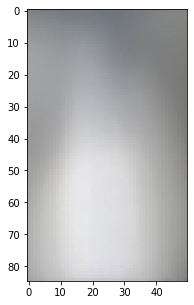

In [36]:
# 白色のRGB値サンプルを取る

ret, raw_frame = camera.read()
frame = cv2.resize(src=raw_frame, dsize=CAMERA_SIZE)
height, width = frame.shape[:2]

WhiteRGB_sample = [frame[i, j] for i in range(height) for j in range(width)]

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
fig = plt.figure(1, (5., 5.))
plt.imshow(img)


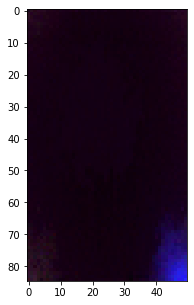

In [68]:
# 黒色のRGB値サンプルを取る

ret, raw_frame = camera.read()
frame = cv2.resize(src=raw_frame, dsize=CAMERA_SIZE)
height, width = frame.shape[:2]

BlackRGB_sample = [frame[i, j] for i in range(height) for j in range(width)]

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
fig = plt.figure(1, (5., 5.))
plt.imshow(img)


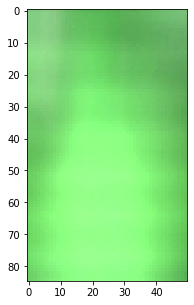

In [70]:
# 緑色のRGB値サンプルを取る

ret, raw_frame = camera.read()
frame = cv2.resize(src=raw_frame, dsize=CAMERA_SIZE)
height, width = frame.shape[:2]

GreenRGB_sample = [frame[i, j] for i in range(height) for j in range(width)]

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
fig = plt.figure(1, (5., 5.))
plt.imshow(img)


In [80]:
# 色識別の分類モデルを作る(SVM)
WhiteRGB_sample = [[point[0], point[1], point[2], 0] for point in WhiteRGB_sample]
BlackRGB_sample = [[point[0], point[1], point[2], 1] for point in BlackRGB_sample]
GreenRGB_sample = [[point[0], point[1], point[2], 2] for point in GreenRGB_sample]

allOf_samples = np.concatenate([WhiteRGB_sample, BlackRGB_sample, GreenRGB_sample])

# SaveInstances(instance=allOf_samples, path="allOf_samples.pickles")
# allOf_samples = LoadInstances(path="allOf_samples.pickles")

X_train, X_test, y_train, y_test = train_test_split(
    allOf_samples[:, :-1],
    allOf_samples[:, -1:],
    stratify=allOf_samples[:, -1:],  # テストに使うデータを階層化する
    test_size=0.3,  # テストに使う割合
)

model = svm.SVC().fit(X_train, y_train)


C:\Users\Haya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


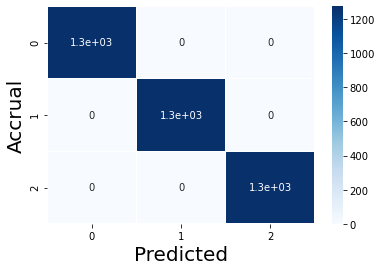

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00      1275
           2       1.00      1.00      1.00      1275

    accuracy                           1.00      3825
   macro avg       1.00      1.00      1.00      3825
weighted avg       1.00      1.00      1.00      3825



In [78]:
# 色識別の分類モデルをテストする

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', linewidth=0.3)
ax.set_xlabel("Predicted", fontsize=20)
ax.set_ylabel("Accrual", fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))
